In [26]:
import os
import pandas as pd
import re
import glob
import numpy as np
import re
from datetime import datetime

In [27]:
def fix_url(url):
    match = re.match(r"https://www.avito.ru/user/(.*?)/profile", url)
    res = url if match is None else match.group(0)
    return res

In [28]:
dfs = []
directory = 'full_data_parts'
for file_name in glob.glob(os.path.join(directory, '*.csv')):
    df = pd.read_csv(file_name).drop(["Unnamed: 0"], axis=1)
    df['url'] = df['url'].apply(fix_url)
    parse_date = re.match(r".*avito_data(.*?) ", file_name).group(1)
    df['parse_date']=datetime.strptime(parse_date,'%Y-%m-%d').toordinal()
    dfs.append(df)

In [29]:
data_full = pd.concat(dfs, ignore_index=True, sort=False)

In [30]:
data_full.shape

(17009, 16)

In [31]:
data_full.drop_duplicates(subset=data_full.columns.difference([parse_date]), keep='first', inplace=True)

In [32]:
data_full.shape

(12454, 16)

In [33]:
data_full.drop_duplicates(subset=['url'], keep='last', inplace=True)

In [34]:
data_full.shape

(12145, 16)

In [35]:
data_full.to_csv('data_full.csv')

In [ ]:
# дальше можно не запускать

In [14]:
data_full["start_date_dt"] = data_full.start_date.dropna().apply(int).apply(datetime.fromordinal)
data_full["first_sold_time_dt"] = data_full.first_sold_time.dropna().apply(int).apply(datetime.fromordinal)
data_full["parse_date_dt"] = data_full.parse_date.apply(int).apply(datetime.fromordinal)
# только при этом в этих новых колонках вместо NaN-ов будут NaT-ы. хз че с этим делать

In [15]:
data_full["first_to_parse"] = data_full.parse_date - data_full.first_sold_time

In [16]:
data_full["reg_to_parse"] = data_full.parse_date - data_full.start_date

In [17]:
data_full["reg_to_first"] = data_full.first_sold_time - data_full.start_date

In [18]:
data_full.groupby(["first_to_parse"]).size()

first_to_parse
0.0       10
1.0        4
2.0        8
3.0       12
4.0       11
5.0        6
6.0        9
7.0        7
8.0        8
9.0        7
10.0      12
11.0       9
12.0      15
13.0      10
14.0       9
15.0       8
16.0      14
17.0      16
18.0      10
19.0      10
20.0       9
21.0      17
22.0      13
23.0       7
24.0      14
25.0      13
26.0      17
27.0      12
28.0      17
29.0      20
          ..
2997.0     2
3002.0     1
3008.0     1
3027.0     1
3040.0     1
3059.0     1
3065.0     1
3079.0     1
3094.0     1
3104.0     2
3110.0     1
3117.0     1
3118.0     1
3127.0     1
3146.0     1
3154.0     1
3165.0     2
3176.0     2
3203.0     1
3207.0     1
3218.0     2
3231.0     1
3233.0     1
3247.0     1
3267.0     1
3333.0     1
3355.0     1
3437.0     1
3534.0     1
3592.0     1
Length: 2244, dtype: int64

In [19]:
data_full.groupby(["reg_to_parse"]).size()

reg_to_parse
2.0        1
3.0        3
25.0       2
26.0      45
27.0      41
28.0      15
29.0      14
30.0       7
31.0      20
32.0       5
33.0      15
34.0      10
35.0       3
56.0       2
57.0      30
58.0      49
59.0      16
60.0      16
61.0       7
62.0      22
63.0       5
64.0      14
65.0       9
66.0       3
86.0       3
87.0      32
88.0      38
89.0      11
90.0      22
91.0       5
          ..
3680.0     3
3686.0     1
3712.0     1
3716.0     2
3740.0     2
3748.0     1
3770.0     1
3772.0     2
3775.0     1
3800.0     1
3801.0     1
3802.0     1
3810.0     1
3832.0     1
3834.0     1
3862.0     3
3863.0     1
3864.0     2
3867.0     2
3869.0     1
3893.0     1
3897.0     1
3898.0     1
3924.0     1
3952.0     1
3953.0     1
3955.0     1
3983.0     2
3986.0     1
4017.0     1
Length: 1188, dtype: int64

In [20]:
data_full["first_to_parse"].hist(bins=100)

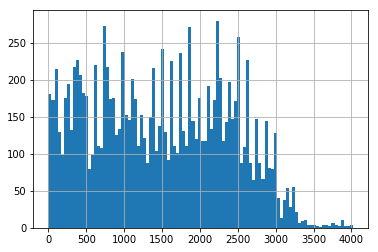

In [21]:
data_full["reg_to_parse"].hist(bins=100)

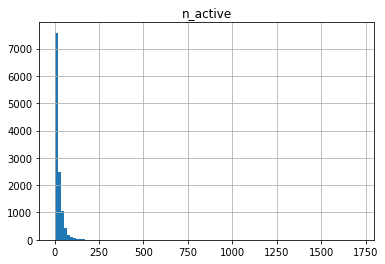

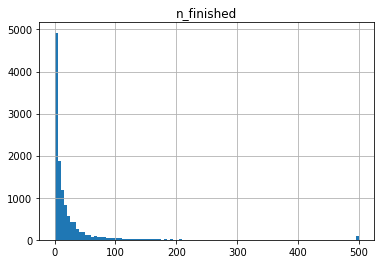

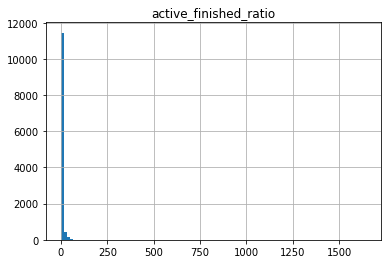

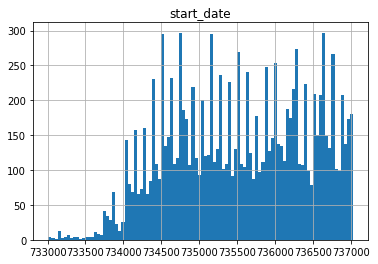

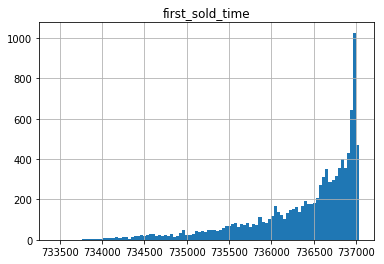

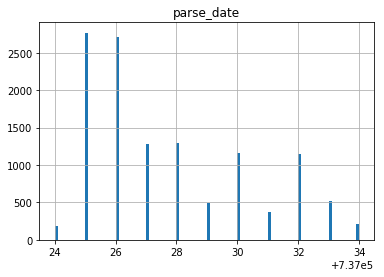

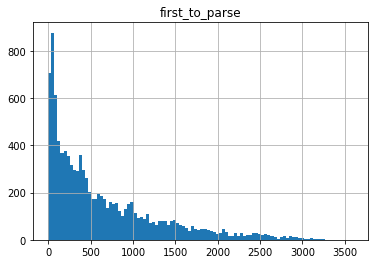

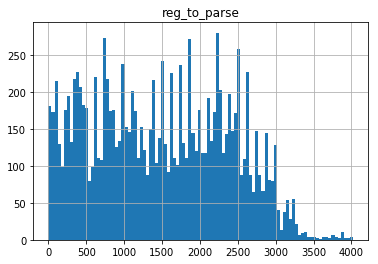

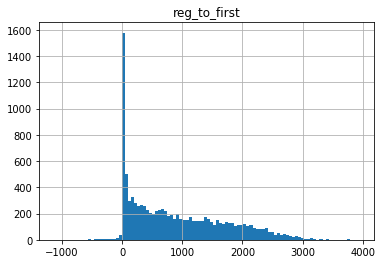

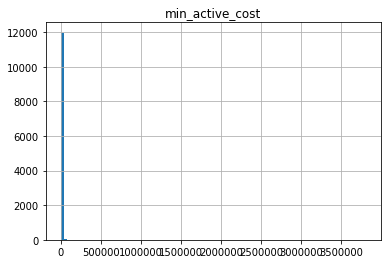

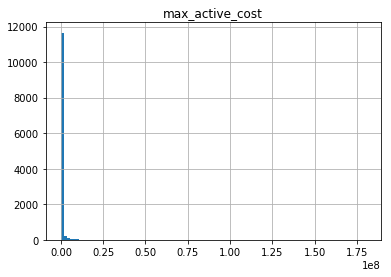

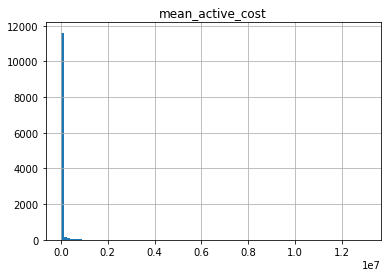

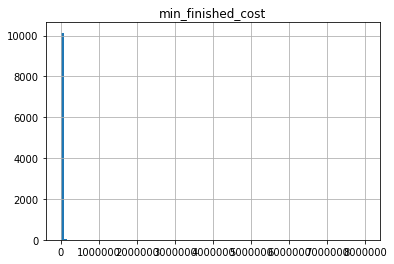

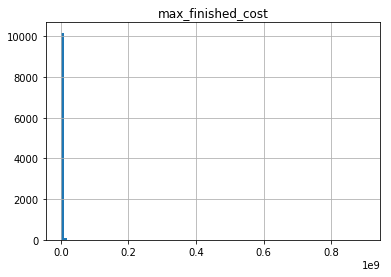

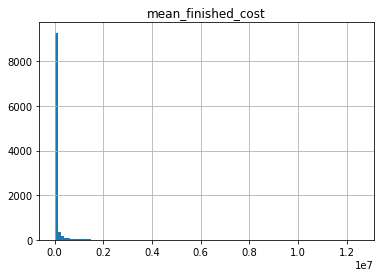

In [24]:
for i in ['n_active', 'n_finished', 'active_finished_ratio',
          'start_date', 'first_sold_time', 'parse_date',
          'first_to_parse', 'reg_to_parse', 'reg_to_first',
          'min_active_cost', 'max_active_cost', 'mean_active_cost',
          'min_finished_cost', 'max_finished_cost', 'mean_finished_cost']:
    data_full.hist(column=i, bins=100)

In [ ]:
data_full.columns